# Logistic Regression (classification Algorithm)

Logistic regression is a supervised classification algorithm

Target/Output variable is categorical or discrete

It's a linear model for clasification

Linear Regression Equation


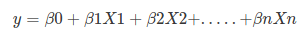

In [5]:

print("Linear Regression Equation")
from IPython.display import Image
Image(filename = "linear.png",width=400,height=400)

Applying the sigmoid function on linear regression


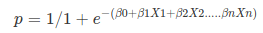

In [8]:
print("Applying the sigmoid function on linear regression")
from IPython.display import Image
Image(filename = "sigmoid_linear.png",width=400,height=400)

sigmoid function or logit function 
---

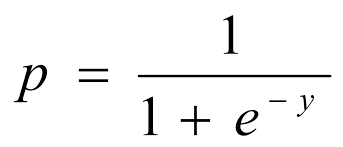

In [9]:
# What is a sigmoid function ?

from IPython.display import Image
Image(filename = "sigmoid.png",width=200,height=200)

p tends towards 1 as  y --> infty


p tends towards 0 as  y--> -infty


p is always bounded between 0 and 1

sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1

If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO

In [10]:
# sigmoid function value calculation

import numpy as np
 
def sigmoid(inputs):
    p = [1 / float(1 + np.exp(- y)) for y in inputs]
    return p
 
 
inputs = [-10, 10, -0, 1, 0, 5]
print ("Sigmoid Function Output :: {}".format(sigmoid(inputs)))
print(int(4.5397868702434395e-05))

Sigmoid Function Output :: [4.5397868702434395e-05, 0.9999546021312976, 0.5, 0.7310585786300049, 0.5, 0.9933071490757153]
0


Bernoulli Distribution
-----------

The dependent/Target/Output variable in logistic regression follows Bernoulli Distribution.

A Bernoulli distribution can give rise to 2 possible outcomes which are labelled as true/false , success/failure , pass/fail , yes/no , cancer/nocancer , etc 



 if p denote success probability , then 1-p is failure probability 



P(o) = 1-p ,  P(1) = p 

Types of Logistic Regression
---

Binary/binomial Logistic Regression : target variable can have only 2 possible types: “0” or “1” which may represent “win” vs “loss”, “pass” vs “fail”, “dead” vs “alive”, etc

Multinomial Logistic Regression :  target variable has three or more nominal categories such as predicting the type of Wine , types of fevers, etc

Ordinal Logistic Regression:  target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5 , , a test score can be categorized as:“very poor”, “poor”, “good”, “very good”..

Building Classification (Logistic Regression) Algorithm to classify vote)
------

In [11]:
import pandas as pd
original_data = pd.read_csv("Indian_voting.csv")
original_data.shape

(944, 9)

In [12]:
original_data.head(3)

,TVnews,self,Congress_approach,BJP_approach,PID,age,education,income,vote
0,7,7,1,6,6,36,3,1,1
1,1,3,3,5,1,20,4,1,0
2,7,2,2,6,1,24,6,1,0


Now let’s discuss each header 

TVnews : The number of time the voter views the Tv news in a week.


self : Is the person’s self–reported political learnings

Congress_approach : Is the person’s impression on congress manifesto

BJP_approach : Is the person’s impression on BJP manifesto

PID : Party Identification of the person.
If the PID is
0 means Strong Democrat,
1 means Week democrat,
2 means Independent democrat likewise


age : Age of the voter.


education : education of the voter

income : income of voter

The vote is the target/output/dependent variable which we are going to predict using the trained logistic regression model.
vote having two possible outcomes: 0 means Congress, 1 means BJP.

In [13]:
original_data.columns

Index(['TVnews', 'self', 'Congress_approach', 'BJP_approach', 'PID', 'age',
       'education', 'income', 'vote'],
      dtype='object')

In [14]:
original_data.describe()

,TVnews,self,Congress_approach,BJP_approach,PID,age,education,income,vote
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [15]:
original_data_corr = original_data.corr()
original_data_corr

,TVnews,self,Congress_approach,BJP_approach,PID,age,education,income,vote
TVnews,1.000000,-0.010855,0.002142,-0.013956,-0.052369,0.408784,-0.058109,-0.062568,-0.014462
self,-0.010855,1.000000,-0.156884,-0.090010,0.618570,0.094656,-0.105868,0.034328,0.583238
Congress_approach,0.002142,-0.156884,1.000000,-0.352915,-0.399477,-0.032549,-0.206416,-0.225122,-0.466574
BJP_approach,-0.013956,-0.090010,-0.352915,1.000000,0.048037,-0.026968,0.185739,0.143972,0.018855
PID,-0.052369,0.618570,-0.399477,0.048037,1.000000,0.008023,0.103628,0.208956,0.797329
age,0.408784,0.094656,-0.032549,-0.026968,0.008023,1.000000,-0.158841,-0.078499,0.053668
education,-0.058109,-0.105868,-0.206416,0.185739,0.103628,-0.158841,1.000000,0.372771,0.085624
income,-0.062568,0.034328,-0.225122,0.143972,0.208956,-0.078499,0.372771,1.000000,0.190257
vote,-0.014462,0.583238,-0.466574,0.018855,0.797329,0.053668,0.085624,0.190257,1.000000


In [16]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 9 columns):
TVnews               944 non-null int64
self                 944 non-null int64
Congress_approach    944 non-null int64
BJP_approach         944 non-null int64
PID                  944 non-null int64
age                  944 non-null int64
education            944 non-null int64
income               944 non-null int64
vote                 944 non-null int64
dtypes: int64(9)
memory usage: 66.5 KB


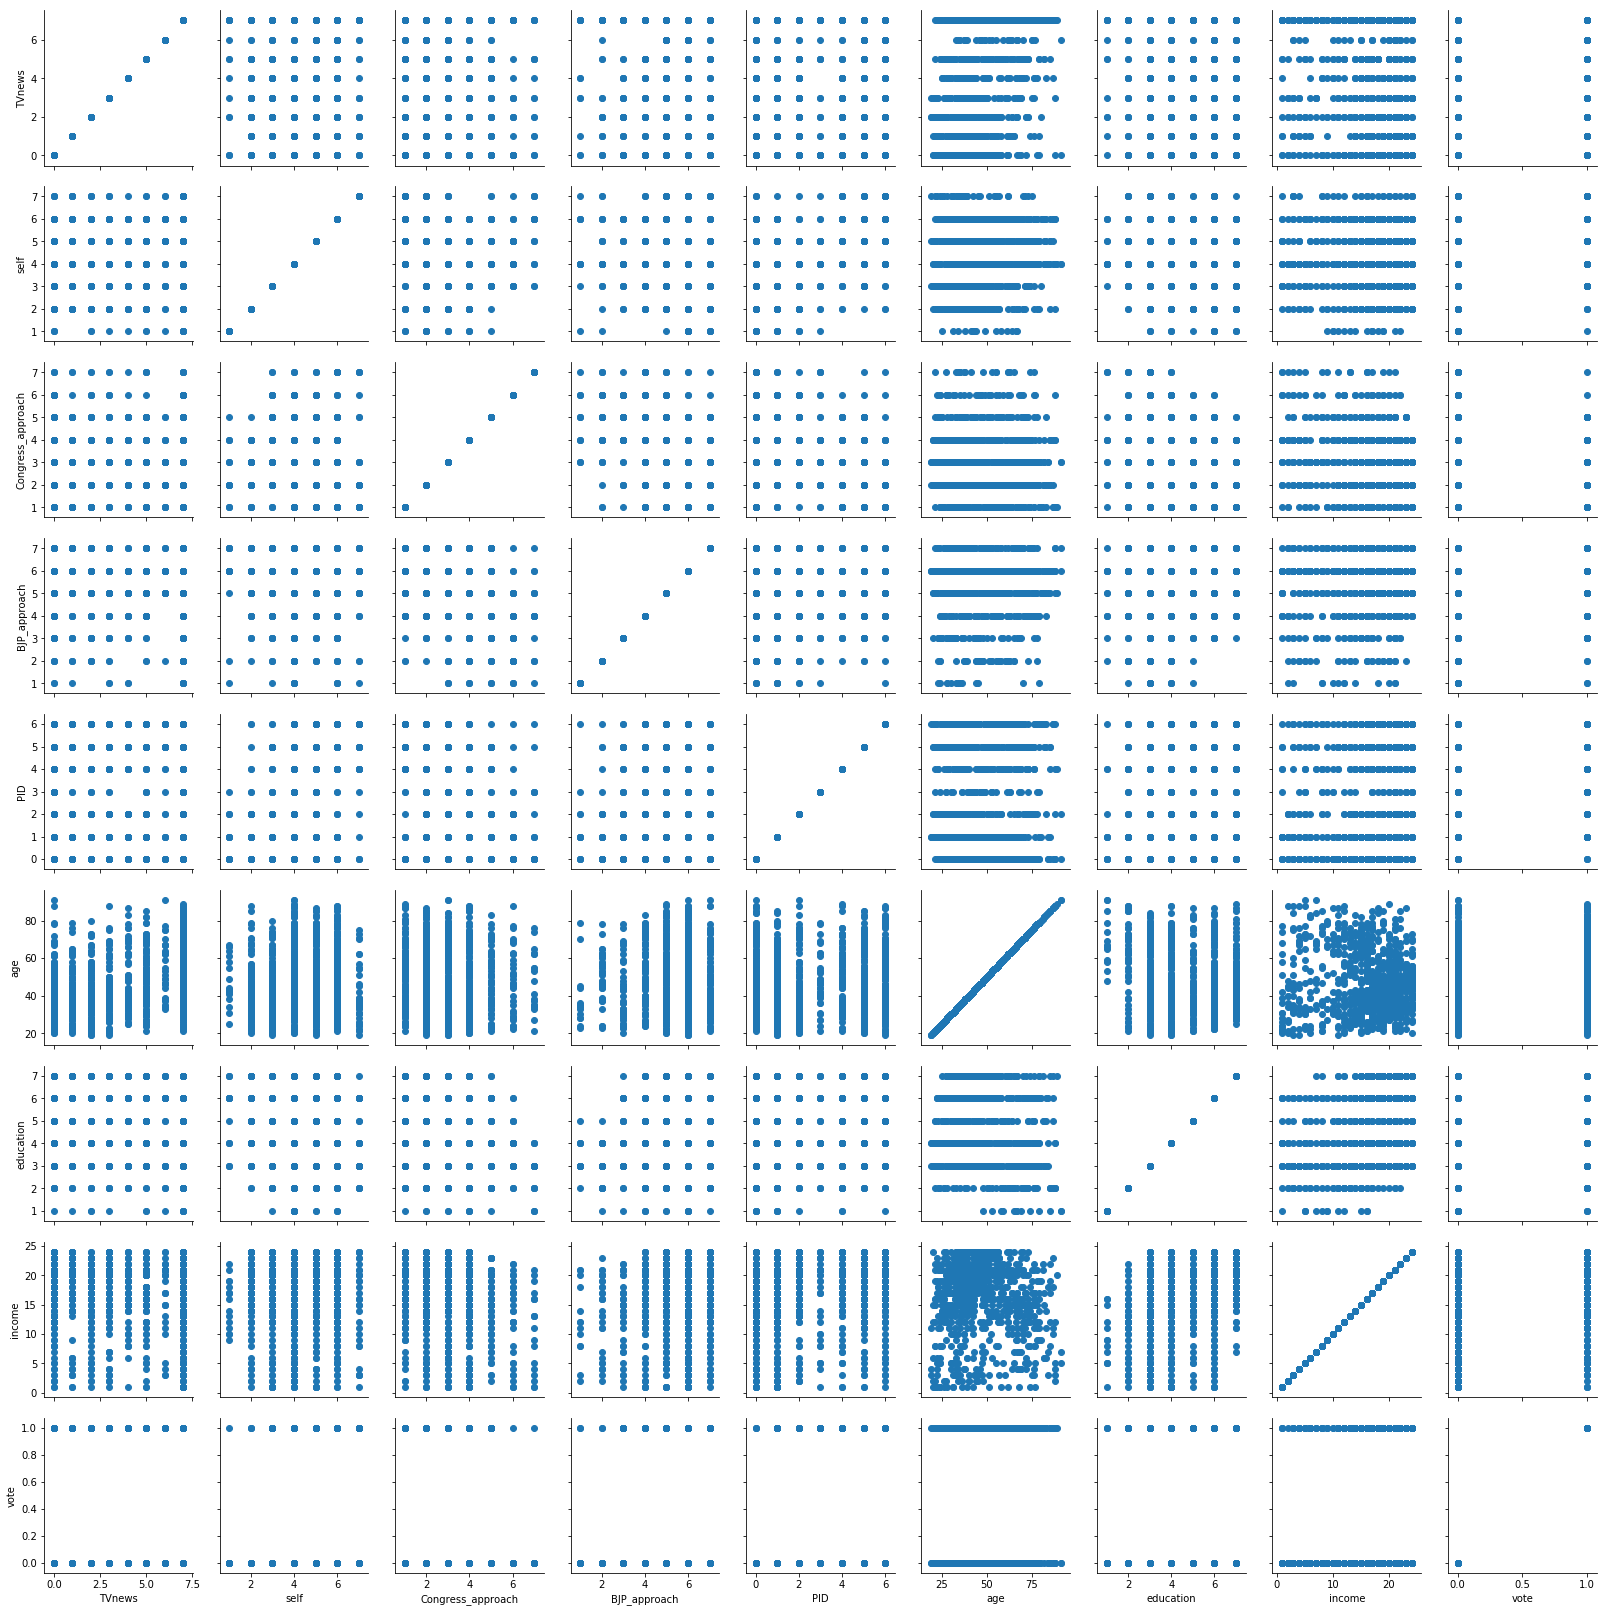

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
grids = sns.PairGrid(original_data)
grids.map(plt.scatter)

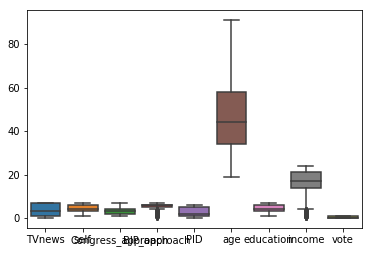

In [19]:
sns.boxplot(data = original_data,orient = 'v')

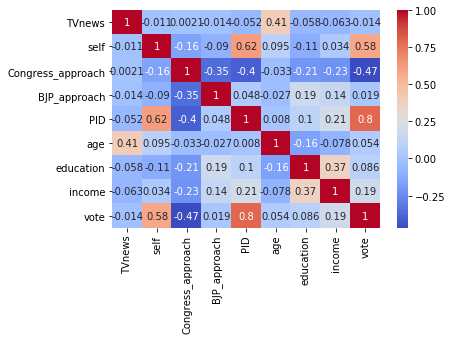

In [20]:
sns.heatmap(original_data_corr,cmap='coolwarm',annot=True)

In [21]:
# Feature or input or independent variables
X = original_data[['TVnews', 'self', 'Congress_approach', 'BJP_approach', 'PID', 'age','education', 'income']]
print(X.head())
X.shape

   TVnews  self  Congress_approach  BJP_approach  PID  age  education  income
0       7     7                  1             6    6   36          3       1
1       1     3                  3             5    1   20          4       1
2       7     2                  2             6    1   24          6       1
3       4     3                  4             5    1   28          6       1
4       7     5                  6             4    0   68          6       1


(944, 8)

In [22]:
# Target or Response or output or dependent variable
y = original_data['vote']
print(y.head())
y.shape

0    1
1    0
2    0
3    0
4    0
Name: vote, dtype: int64


(944,)

In [23]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
print(original_data.shape)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(944, 9)
(944, 8)
(944,)
(660, 8)
(284, 8)
(660,)
(284,)


In [24]:
# Import the class containing the classification method
from sklearn.linear_model import LogisticRegression

In [27]:
# Create an instance of the class
LRC = LogisticRegression()
print(dir(LRC))

['C', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_estimator_type', '_get_param_names', '_predict_proba_lr', 'class_weight', 'decision_function', 'densify', 'dual', 'fit', 'fit_intercept', 'get_params', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params', 'solver', 'sparsify', 'tol', 'verbose', 'warm_start']


In [28]:
# Fit the instance on the data and then predict the expected value 
LRC = LRC.fit(X_train, y_train)
print(dir(LRC.fit(X_train, y_train)))

['C', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_estimator_type', '_get_param_names', '_predict_proba_lr', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'max_iter', 'multi_class', 'n_iter_', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params', 'solver', 'sparsify', 'tol', 'verbose', 'warm_start']


C:\Users\DBREDDY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DBREDDY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
# Interpreting model coefficients
print(LRC.intercept_)
print(LRC.coef_)

[-0.77453801]
[[ 0.06944209  0.52680504 -0.94019601 -0.54791235  1.0481388  -0.004014
  -0.00667801  0.02063017]]


In [32]:
# import the metrics class
from sklearn import metrics

In [31]:
y_pred=LRC.predict(X_test)

In [33]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [29]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
# Diagonal Elements are accurate predictions
# NON-Diagonal elements are inaccurate predictions

array([[155,  17],
       [ 10, 102]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

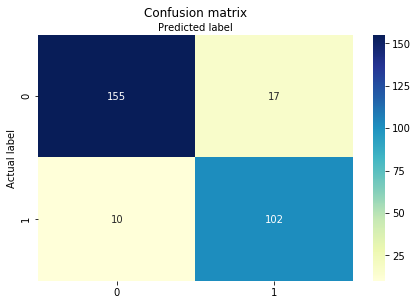

In [31]:
class_names=[0,1] # name  of classes -- 0 means Congress, 1 means BJP
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve


In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9049295774647887
Precision: 0.8571428571428571
Recall: 0.9107142857142857
F1_score: 0.8831168831168831


classification rate of 90%, considered as good accuracy.

Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

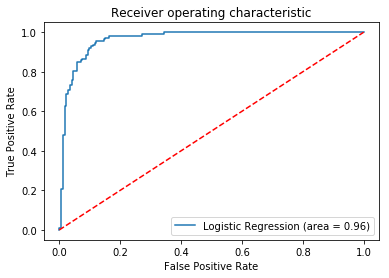

In [36]:
y_pred_proba = LRC.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.96. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       172
           1       0.86      0.91      0.88       112

   micro avg       0.90      0.90      0.90       284
   macro avg       0.90      0.91      0.90       284
weighted avg       0.91      0.90      0.91       284



Sigmod function is used for binomial logistic Regression 

softmax function is used for multinomial logistic regression 

In [38]:
# LogisticRegression(multiclass = 'multinomial') takes softmax function by default in backend calculation 

In [39]:
# No of classes = shape of your confusion matrix 

In [40]:
# if 3 classes are there then confusion matrix size is 3*3

In [1]:
# Good Logistic regression means Less values of FN & FP , High Values of TN & TP
#FN --> Type2 error
#FP --> Type1 error

